# AVALIAÇÃO DA SOLICITAÇÃO DE DEMISSÃO DE FUNCIONÁRIOS

O presente trabalho visa avaliar os datasets do __Departament of Education, Training and Employment ([DETE](https://www.qld.gov.au/education))__ e do instituto __Technical and Further Education ([TAFE](https://www.studiesinaustralia.com/studying-in-australia/what-to-study-in-australia/types-of-education/technical-and-further-education))__, de Queensland, Austrália, com o intuito de avaliar se o principal motivo para os pedidos de demissão dos últimos anos (em ambos departamentos) foi a insatisfação com o trabalho realizado.

Para sintetizar e direcionar o estudo, buscaremos responder a seguinte pergunta:

- Empregados que trabalharam por um curto período de tempo pediram demissão por algum tipo de insatisfação? E quanto aos empregados mais experientes?


In [1]:
# importação das bibliotecas principais

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

__Analisando cada dataset, separadamente. Primeiro, vamos analisar os dados do dataset DETE:__

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


_Verificando se há valores nulos nos principais fatores:_

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
dete_survey[['DETE Start Date']].value_counts().sort_index()

DETE Start Date
1963                4
1965                1
1966                1
1967                2
1968                3
1969               10
1970               21
1971               10
1972               12
1973                8
1974               14
1975               21
1976               15
1977               11
1978               15
1979               14
1980               14
1981                9
1982                4
1983                9
1984               10
1985                8
1986               12
1987                7
1988               15
1989               17
1990               20
1991               18
1992               18
1993               13
1994               10
1995               14
1996               19
1997               14
1998               14
1999               19
2000               18
2001               10
2002               15
2003               15
2004               18
2005               20
2006               23
2007               34
2008            

In [6]:
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [7]:
dete_survey['Age'].value_counts(dropna = False).sort_index()

20 or younger      1
21-25             40
26-30             57
31-35             39
36-40             51
41-45             61
46-50             63
51-55            103
56-60            174
61 or older      222
NaN               11
Name: Age, dtype: int64

In [8]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
04/2014         2
08/2012         2
04/2013         2
07/2014         2
07/2012         1
2014            1
2010            1
07/2006         1
09/2014         1
09/2010         1
11/2012         1
Name: Cease Date, dtype: int64

- OBSERVAÇÕES: Por meio da análise exploratória preliminar, observa-se que a maioria dos entrevistados do DETE são maiores de 50 anos (mais de 60%) e que cerca de 89% dos entrevistados não apontaram a insatisfação com o trabalho. Contudo, essa análise não é suficiente para responder nosso estudo, visto que o motivo para demissão dos funcionários variam, como veremos a frente.

__Analisando agora os dados do dataset TAFE:__

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [10]:
tafe_survey.shape

(702, 72)

In [11]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [12]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [13]:
tafe_survey['CurrentAge. Current Age'].value_counts(dropna = False).sort_index()  # avaliando a idade dos funcionários

20 or younger     16
21  25            44
26  30            50
31  35            52
36  40            51
41  45            80
46  50            59
51-55             82
56 or older      162
NaN              106
Name: CurrentAge. Current Age, dtype: int64

In [14]:
# Avaliando o tempo de serviço dos funcionários na TAFE

tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna = False).sort_index()

1-2                   102
11-20                  89
3-4                    96
5-6                    48
7-10                   43
Less than 1 year      147
More than 20 years     71
NaN                   106
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

- OBSERVAÇÕES: Após análise preliminar realizada acima, pode-se observar que cerca de 41% dos entrevistados (excluídos os que não apresentam dados de idade) têm mais de 50 anos. Outro ponto observado é que aproximadamente 25% desses entrevistados trabalharam menos de 1 ano na empresa.

## Limpeza de dados

- Com o objetivo de melhorar a visualização dos dados de ambos datasets, será necessário refazer a leitura do dataset DETE, alterando os valores que estão listados como __Not Stated__ (presentes principalmente na coluna ___Cease Date___) para valores nulos, do tipo __Nan__. 

In [15]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Checando se a substituição foi realizada com sucesso:

In [16]:
dete_survey['Cease Date'].value_counts(dropna = False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
07/2014      2
04/2014      2
02/2014      2
04/2013      2
2010         1
07/2012      1
07/2006      1
09/2014      1
09/2010      1
11/2012      1
2014         1
Name: Cease Date, dtype: int64

- Agora, iremos __remover colunas__ que não serão necessárias para nossa análise, em ambos os datasets, facilitando o processo.

In [17]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
dete_survey_updated.shape[1], tafe_survey_updated.shape[1]  # checando o número de colunas de cada dataset

(35, 23)

- Como ambos os datasets são provenientes do mesmo governo, em passos futuros, iremos ___concatenar___ os datasets, tornando nossa análise mais precisa. Para tanto, é necessário renomear as colunas em comum, para ambos os datasets. 

In [18]:
dete_survey_updated.columns  # checando o nome atual das colunas

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [19]:
# atualizando as colunas para DETE dataset

dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.replace('/','_').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [20]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [21]:
# atualizando as colunas para FATE dataset

new_columns = {'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapper = new_columns, axis = 1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Continuando o tratamento dos datasets

In [22]:
# checando os valores da coluna separationtype (motivo da demissão) de cada dataset

sep_values_dete = dete_survey_updated['separationtype'].value_counts(dropna = False)
sep_values_tafe = tafe_survey_updated['separationtype'].value_counts(dropna = False)
sep_values_dete, sep_values_tafe

(Age Retirement                          285
 Resignation-Other reasons               150
 Resignation-Other employer               91
 Resignation-Move overseas/interstate     70
 Voluntary Early Retirement (VER)         67
 Ill Health Retirement                    61
 Other                                    49
 Contract Expired                         34
 Termination                              15
 Name: separationtype, dtype: int64,
 Resignation                 340
 Contract Expired            127
 Retrenchment/ Redundancy    104
 Retirement                   82
 Transfer                     25
 Termination                  23
 NaN                           1
 Name: separationtype, dtype: int64)

- OBSERVAÇÕES: Como o principal objetivo de nossa análise é __avaliar se funcionários com pouco tempo de trabalho, assim como os mais antigos, saíram por algum tipo de insatisfação__, iremos focar apenas no valor _Resignation_ (pedido de demissão) como razão do desligamento da empresa. Para tanto, é necessário atualizar os valores de _Resignation_ para o dataset DETE, visto que existem 3 valores distintos, conforme apresentado acima, além de __criar um novo dataset__, o qual contenha apenas _Resignation_ como valor para _separationtype_.

In [23]:
# Para o dataset DETE

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0] # atualizando o nome Resignation
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()  # Para evitar o erro SettingwithCopyWarning

# Para o dataset TAFE

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()  # Para evitar o erro SettingwithCopyWarning
dete_resignations['separationtype'].value_counts(), tafe_resignations['separationtype'].value_counts()

(Resignation    311
 Name: separationtype, dtype: int64,
 Resignation    340
 Name: separationtype, dtype: int64)

## Avaliando os valores da coluna _cease_date_

Para seguir com a análise exploratória, é necessário extrair as informações referentes ao tempo de serviço. Contudo, é necessário antes realizar o tratamento da coluna ___cease_date___(data da demissão) e análise da coluna ___dete_start_date___ (ano de início do trabalho) para o dataset DETE, visto que, diferente do TAFE dataset, aquele não possui uma coluna específica para o tempo de serviço.

In [24]:
# Para o dataset DETE

dete_resignations['cease_date'].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

- __OBSERVAÇÕES__: Como é possível observar na análise acima, será preciso realizar o tratamento desses dados, para extrair apenas o ano de saída. Iremos utilizar vetorização para isso.

In [25]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [26]:
dete_resignations['cease_date'].value_counts(dropna = False).sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64

In [27]:
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

<AxesSubplot:>

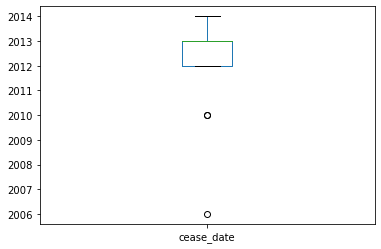

In [28]:
dete_resignations.boxplot('cease_date', grid = False) 

<AxesSubplot:>

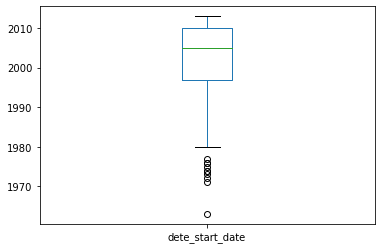

In [29]:
dete_resignations.boxplot('dete_start_date', grid = False)

## Criando a variável _institute_service_ para o dataset DETE

Conforme mencionado anteriormente, o dataset DETE não possui uma variável específica para o tempo de serviço, variável esta indispensável para nossa análise final. No dataset _TAFE_ essa variável está localizada na coluna ___institute_service___. Desta forma, por padrão, iremos criar essa mesma variável para o dataset DETE.

In [30]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [31]:
dete_resignations['institute_service'].value_counts(dropna=False).sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64

## Avaliando o fator _insatisfação_ em cada dataset

- Como o principal objetivo de nossa análise é avaliar se os pedidos de demissão de trabalhadores das duas instituições ocorreram devido a algum tipo de insatisfação, iremos criar uma nova coluna em cada dataset, chamada ___dissatisfaction___. 
- Para o dataset do __TAFE__, serão levadas em conta as colunas ___Contributing Factors. Dissatisfaction___ e ___Contributing Factors. Job Dissatisfaction___. Já para o dataset __DETE__, serão utilizadas as seguintes colunas: ___job_dissatisfaction, dissatisfaction_with_the_department, physical_work_environment, lack_of_recognition, lack_of_job_security, work_location, employment_conditions, work_life_balance e workload___.  

In [32]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False), tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

(-                                         277
 Contributing Factors. Dissatisfaction      55
 NaN                                         8
 Name: Contributing Factors. Dissatisfaction, dtype: int64,
 -                      270
 Job Dissatisfaction     62
 NaN                      8
 Name: Contributing Factors. Job Dissatisfaction, dtype: int64)

In [33]:
# convertendo os valores das colunas Contributing Factors. Dissatisfaction e Contributing Factors. Job Dissatisfaction em True e False

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else: 
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [34]:
# criando a coluna 'dissatisfaction' para ambos os datasets
# Para o dataset TAFE

tafe_resignations['dissatisfaction'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                          'Contributing Factors. Job Dissatisfaction']].any(axis = 1, 
                                                                                                            skipna = False).copy()

tafe_resignations['dissatisfaction'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfaction, dtype: int64

In [35]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfaction
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


- Avaliando agora o dataset DETE:

In [36]:
# avaliando o dataset DETE

dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                   'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 
                   'employment_conditions', 'work_life_balance', 'workload']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   job_dissatisfaction                  311 non-null    bool 
 1   dissatisfaction_with_the_department  311 non-null    bool 
 2   physical_work_environment            311 non-null    bool 
 3   lack_of_recognition                  311 non-null    bool 
 4   lack_of_job_security                 311 non-null    bool 
 5   work_location                        311 non-null    bool 
 6   employment_conditions                311 non-null    bool 
 7   work_life_balance                    311 non-null    bool 
 8   workload                             311 non-null    bool 
dtypes: bool(9)
memory usage: 5.2 KB


In [37]:
# criando a coluna 'dissatisfaction' para o dataset DETE

dete_resignations['dissatisfaction'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                   'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 
                   'employment_conditions', 'work_life_balance', 'workload']].any(axis = 1, skipna = False).copy()

dete_resignations['dissatisfaction'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfaction, dtype: int64

In [38]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfaction
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [39]:
dete_resignations[['id','separationtype','institute_service','dissatisfaction']].head()

,id,separationtype,institute_service,dissatisfaction
3,4,Resignation,7.0,False
5,6,Resignation,18.0,True
8,9,Resignation,3.0,False
9,10,Resignation,15.0,True
11,12,Resignation,3.0,False


In [53]:
tafe_resignations[['id','separationtype','institute_service','dissatisfaction']].head()

,id,separationtype,institute_service,dissatisfaction
3,6.341399e+17,Resignation,NaN,False
4,6.341466e+17,Resignation,3-4,False
5,6.341475e+17,Resignation,7-10,False
6,6.341520e+17,Resignation,3-4,False
7,6.341537e+17,Resignation,3-4,False


- __OBSERVAÇÕES__: Após a manipulação de dados realizada acima, observa-se que foi criada com sucesso a coluna ___dissatisfaction___ em ambos datasets, com o objetivo de melhor realizarmos nossa análise. Agora, iremos combinar os dois datasets.

## Combinando os datasets

Para que a nossa análise seja mais precisa, iremos fazer a combinação de ambos os datasets, utilizando a função concat() do pandas. Para evitar confusão no momento de analisar o dataset final, iremos criar uma coluna ___institute___ para o DETE e TAFE para diferenciar ambos os institutos.

In [40]:
# Criando uma cópia de ambos datasets

dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [41]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [42]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfaction,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [43]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfaction,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [44]:
# combinando os dois datasets

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.shape

(651, 53)

In [45]:
# removendo colunas que tenham mais que 500 valores nulos

combined_update = combined.dropna(thresh = 500, axis = 1).copy()
combined_update.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfaction,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


- __OBSERVAÇÕES__: Como é possível observar, foram realizadas algumas manipulações acima com o intuito de aumentar a quantidade de dados para análise, porém mantendo a qualidade desses dados. Após a combinação do dataset DETE e do dataset TAFE, foram removidas algumas colunas as quais não seriam úteis para atender ao objetivo desse estudo. A seguir, iremos realizar o tratamento da coluna ___institute_service___, visto que, para os dados de TAFE, parte desses dados estão na forma de __obj__ e não __float__.

In [46]:
combined_update['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [47]:
combined_update['institute_service_up'] = combined_update['institute_service'].astype('str').str.extract(r'(\d+)')  # método para extração de dígitos
combined_update['institute_service_up'] = combined_update['institute_service_up'].astype('float')
combined_update['institute_service_up'].value_counts(dropna=False).sort_index()


0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service_up, dtype: int64

- __OBSERVAÇÕES__: Para melhor avaliar a experiência de cada funcionário a fim de responder os questionamentos do início deste trabalho, iremos transformar a coluna ___institute_service___ em categorias, como mostrado abaixo:

    - __New__: Menos de 3 anos na companhia;
    - __Experienced__: De 3 a 6 anos na companhia;
    - __Established__: De 7 a 10 anos na companhia;
    - __Veteran__: Mais de 11 anos na companhia.

In [48]:
# criando função para mapeamento e transformação da coluna institute_service

def col_transform(val):
    if 3 <= val < 7:
        return 'Expecienced'
    elif 7 <= val < 11:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'
    

In [49]:
# aplicando a função acima na coluna coluna institute_service e criando nova coluna (service_cat)

combined_update['service_cat'] = combined_update['institute_service_up'].apply(col_transform)
combined_update['service_cat'].value_counts(dropna = False)

New            193
Expecienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Avaliando a coluna _dissatisfaction_ e  realizando análise

Por fim, iremos realizar uma análise para avaliar a pergunta alvo do nosso trabalho:

   - Empregados que trabalharam por um curto período de tempo pediram demissão por algum tipo de insatisfação? E quanto aos empregados mais experientes?

In [50]:
combined_update['dissatisfaction'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfaction, dtype: int64

In [51]:
# preenchendo os valores nulos com o valor mais frequente da coluna dissatisfaction (False)

combined_update['dissatisfaction'].fillna(False, inplace = True)
combined_update['dissatisfaction'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfaction, dtype: int64

<AxesSubplot:xlabel='service_cat'>

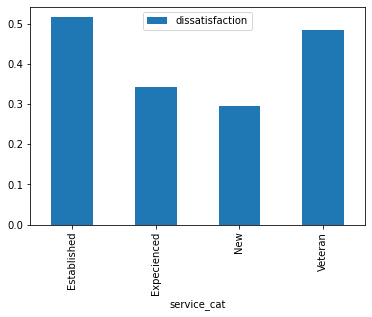

In [56]:
# checando a porcentagem de trabalhadores insatisfeitos de cada service-cat

%matplotlib inline
dis_serv = combined_update.pivot_table(index = 'service_cat', values = 'dissatisfaction')
dis_serv.plot(kind = 'bar')


### CONCLUSÃO

Após o tratamento e concatenação dos datasets, foi possível isolar e analisar as informações:

- Apenas cerca de 30% dos empregados que trabalharam menos de 3 anos, em ambos institutos (DETE e TAFE), pediram demissão por algum tipo de insatisfação no trabalho.
- Em contrapartida, funcionários mais experientes apresentaram maior frequência de solicitação de demissão devido a insatisfação com o trabalho. Observa-se uma porcentagem maior de insatisfação quanto maior foi o tempo de serviço desses empregados.